### Unsupervised Machine Learning 

model is trianed on data that is neither classified nor labeled

we have only features and those features can be in any form ( text, audio, video, numerical data, etc). we do not have labels

#### Semi-Supervised model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [2]:
filterwarnings(action='ignore')

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
X, y = iris.drop('species',axis=1), iris['species']

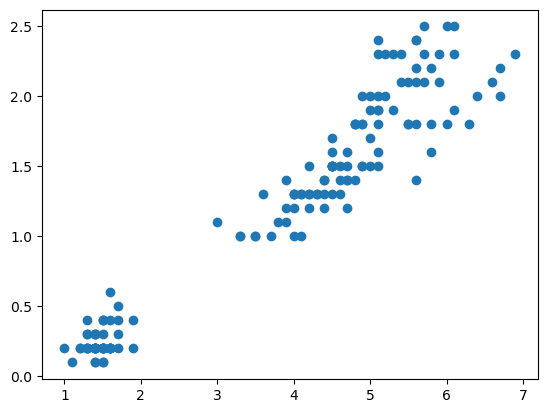

In [6]:
plt.scatter(X['petal_length'], X['petal_width'])
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3, n_init=10)

In [9]:
#  import os
#  os.environ["OMP_NUM_THREADS"] = "1"

In [10]:
model.fit(X)

KMeans(n_clusters=3, n_init=10)

In [11]:
model.inertia_

78.85144142614601

In [12]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
centroids = model.cluster_centers_
centroids
# sepal_length   sepal_width   petal_length  petal_width

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
centers = centroids[:, -2:]
centers

array([[4.39354839, 1.43387097],
       [1.462     , 0.246     ],
       [5.74210526, 2.07105263]])

In [15]:
color = ['r', 'g', 'b']

In [16]:
for point, c in zip(centers, color):
    print(point, c)

[4.39354839 1.43387097] r
[1.462 0.246] g
[5.74210526 2.07105263] b


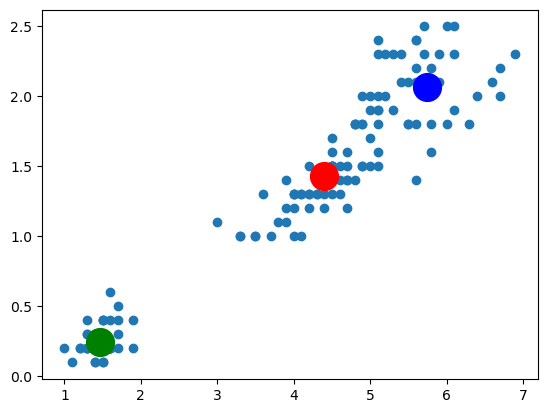

In [17]:
plt.scatter(X['petal_length'], X['petal_width'])

for point, c in zip(centers, color):
    plt.plot([point[0]], [point[1]], 'o', ms=20, color=c)
    
plt.show()

In [18]:
X.columns = ['A', 'B', 'C', 'D']

In [19]:
X.head(5)

,A,B,C,D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
n_clusters = []
inertia = []
for k in range(1,10):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    n_clusters.append(k)
    inertia.append(model.inertia_)

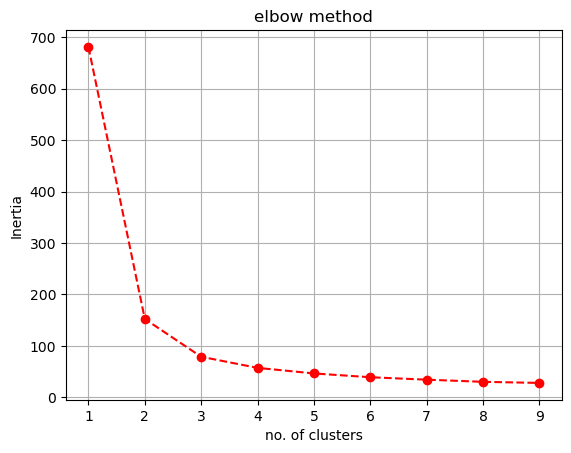

In [21]:
plt.plot(n_clusters, inertia, 'ro--')
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [22]:
X.iloc[-1]
# last row

A    5.9
B    3.0
C    5.1
D    1.8
Name: 149, dtype: float64

In [23]:
model = KMeans(n_clusters=3, n_init=10)
model.fit(X)

KMeans(n_clusters=3, n_init=10)

In [24]:
X.loc[0] 
# values for setosa

A    5.1
B    3.5
C    1.4
D    0.2
Name: 0, dtype: float64

In [25]:
X_new = [ [4.2, 3.2, 6, 1.2], [4.3, 4.2, 4.1, 4.0], [5.1, 3.5, 1.4, 0.2], 
         [6.4, 5.2, 4.5, 9.5] ]
model.predict(X_new)

array([0, 0, 1, 2])

In [26]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
iris[iris['species'] == 'versicolor'][:2]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


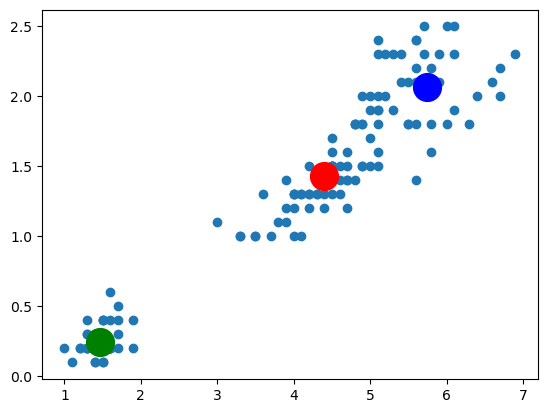

In [28]:
centers = centroids[: , -2:]
color = ['r', 'g', 'b'] # r -> 0, g -> 1, b -> 2

plt.scatter(X['C'], X['D'])

for point, c in zip(centers, color):
    plt.plot([point[0]], [point[1]], 'o', ms=20, color=c)
    
plt.show()

In [33]:
y_hat = model.predict(X)
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [34]:
map_dict = {
    1: 'setosa',
    0: 'versicolor',
    2: 'virginica'
}

In [35]:
y_hat = pd.Series(y_hat).map(map_dict)

In [36]:
y_hat

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146    versicolor
147     virginica
148     virginica
149    versicolor
Length: 150, dtype: object

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(list(y), list(y_hat)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [45]:
model = KMeans(n_clusters = 3, n_init = 10)
model.fit(X)
y_hat = model.predict(X)

map_dict = {0: 'versicolor', 1: 'setosa', 2: 'virginica'}
y_hat = pd.Series(y_hat).map(map_dict)
print(classification_report(list(y), list(y_hat)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## How to save model

In [47]:
import joblib

In [48]:
joblib.dump(model, 'clustering_model.pkl')

['clustering_model.pkl']

## deployment server

In [1]:
import joblib

In [2]:
model = joblib.load('clustering_model.pkl')

In [3]:
model

KMeans(n_clusters=3, n_init=10)

In [4]:
X_new = [ [4.2, 3.2, 6, 1.2], [4.3, 4.2, 4.1, 4.0], [5.1, 3.5, 1.4, 0.2], 
         [6.4, 5.2, 4.5, 9.5] ]
model.predict(X_new)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0, 1, 2])

user -> web -> form -> X_new ----> server --> model load --> predict -> web -> user

#### Study about Dimensionality Reduction